# Census Income data set

In [485]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

%matplotlib inline

In [676]:
#Importamos el dataset
data = pd.read_csv("adult.csv")
data.shape

(32561, 15)

In [677]:
#Visualizamos los primeros 5 datos del dataset
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 1. Limpieza de los datos

In [678]:
#Cambiamos los símbolos '?' por NaN
data[data == '?'] = np.nan
data

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [679]:
#Vemos los tipos de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [680]:
#Nos deshacemos  de los NaN
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [681]:
#Mostramos los valores nulos por atribut
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 2. Análisis exploratorio de los datos
Exploramos nuestro conjunto de datos.

In [682]:
#Resumen estadístico
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [683]:
#Variable objetivo: número de etiquetas por clase
#0: < 50k, 1: > 50k
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [684]:
data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


#### Visualización de variables categóricas


In [601]:
#Función para crear diagramas de barras
def bar_plot(variable):
    #Variable a representar
    var = data[variable]
    #Frecuencia de cada valor de la variable
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation = 90)
    plt.ylabel("Frequencia")
    plt.title(variable)
    plt.show()
    #Tabla con los datos
    print("{}:\n {}".format(variable,varValue))

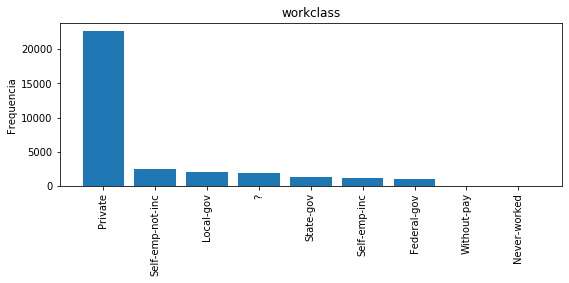

workclass:
 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


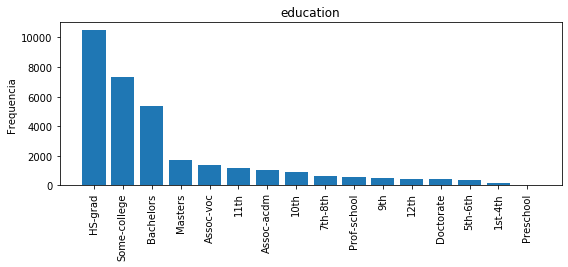

education:
 HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


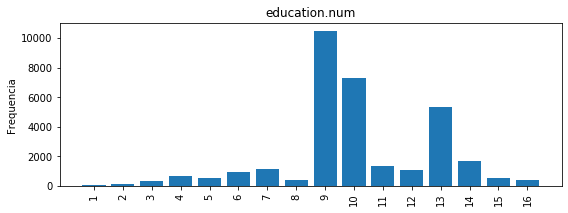

education.num:
 9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64


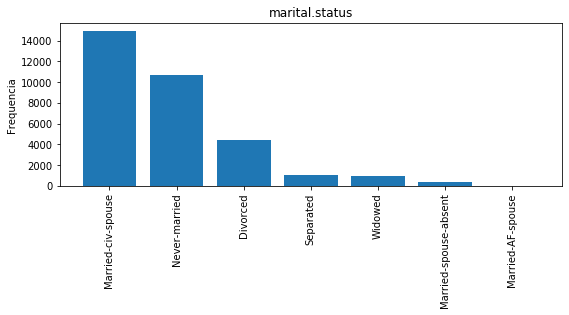

marital.status:
 Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


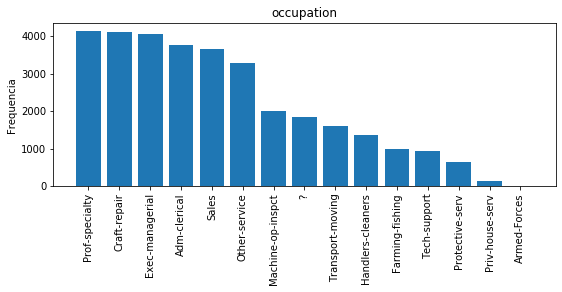

occupation:
 Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


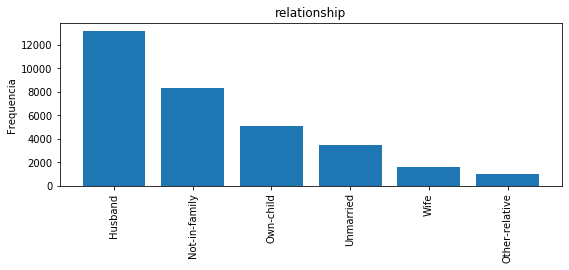

relationship:
 Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


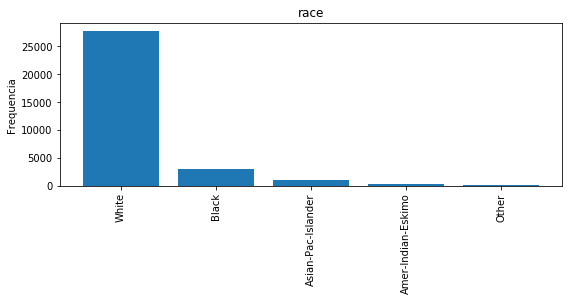

race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


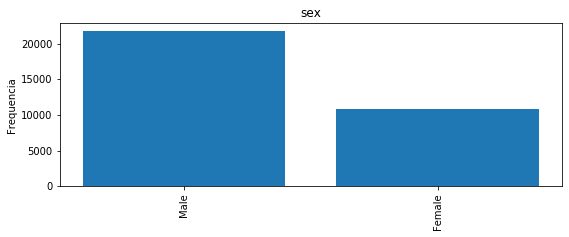

sex:
 Male      21790
Female    10771
Name: sex, dtype: int64


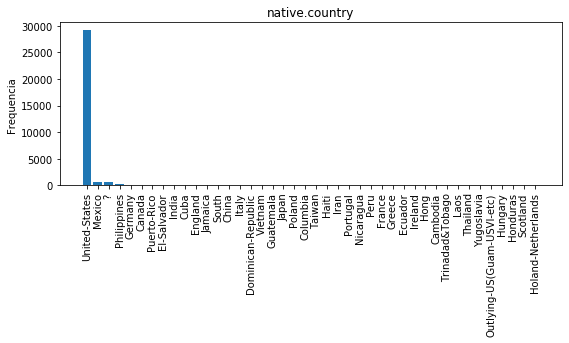

native.country:
 United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France     

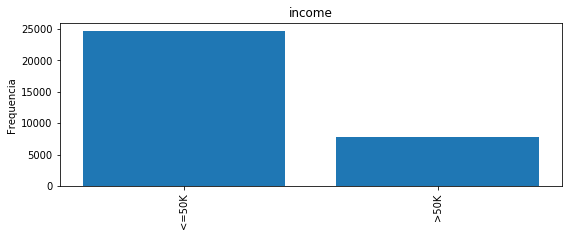

income:
 <=50K    24720
>50K      7841
Name: income, dtype: int64


In [603]:
#Variables categóricas
category = ["workclass", "education", "education.num", "marital.status", "occupation", "relationship",
            "race", "sex", "native.country", "income"]
#Las representamos
for c in category:
    bar_plot(c)

[Text(0, 0, 'Husband'),
 Text(0, 0, 'Not-in-family'),
 Text(0, 0, 'Own-child'),
 Text(0, 0, 'Unmarried'),
 Text(0, 0, 'Wife'),
 Text(0, 0, 'Other-relative')]

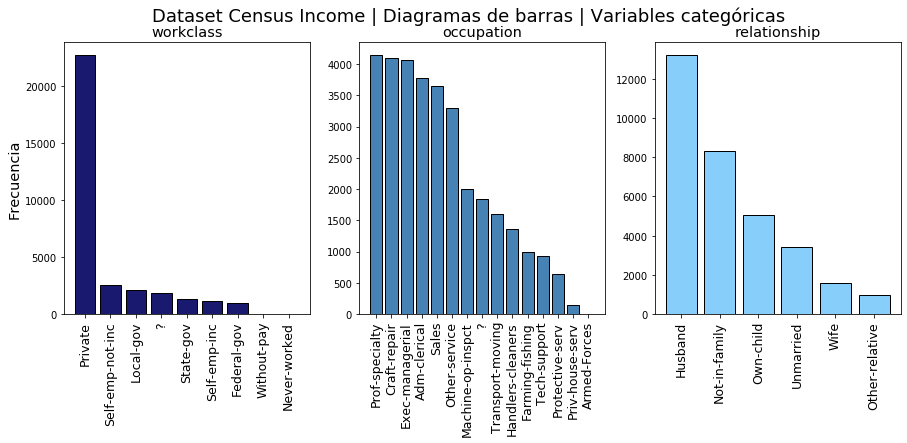

In [656]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()
fig.suptitle('Dataset Census Income | Diagramas de barras | Variables categóricas', fontsize = 18)
      
ax0.set_title('workclass', fontsize = 14.5)
var = data["workclass"]
varValue = var.value_counts()
ax0.bar(varValue.index, varValue, color = "midnightblue",  edgecolor = 'black')    
ax0.set_xticklabels(varValue.index.values, fontsize = 12.5, rotation=90)
ax0.set_ylabel("Frecuencia", fontsize = 14.5)

ax1.set_title('occupation', fontsize = 14.5)
var = data["occupation"]
varValue = var.value_counts()
ax1.bar(varValue.index, varValue, color = "steelblue", edgecolor = 'black')    
ax1.set_xticklabels(varValue.index.values, fontsize = 12.5, rotation=90)
            
ax2.set_title('relationship', fontsize = 14.5)
var = data["relationship"]
varValue = var.value_counts()
ax2.bar(varValue.index, varValue, color ="lightskyblue", edgecolor = 'black')    
ax2.set_xticklabels(varValue.index.values, fontsize = 12.5, rotation=90)



#### Visualización de variables numéricas

In [610]:
#Función para crear histogramas
def plot_hist(variable):
    plt.figure(figsize = (5,6))
    plt.hist(data[variable], bins = 50, color = "steelblue", edgecolor = "black")
    plt.xlabel(variable, fontsize = 14.5)
    plt.ylabel("Frequencia", fontsize = 14.5)
    plt.title("Histograma con la distribución de {}".format(variable), fontsize = 18)
    plt.show()

(array([  205.,   531.,   645.,  1547.,  1015.,  1302.,  1635., 16100.,
         2442.,   677.,  3036.,   841.,  1519.,   277.,   365.,    83.,
          182.,    20.,    34.,   105.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <a list of 20 Patch objects>)

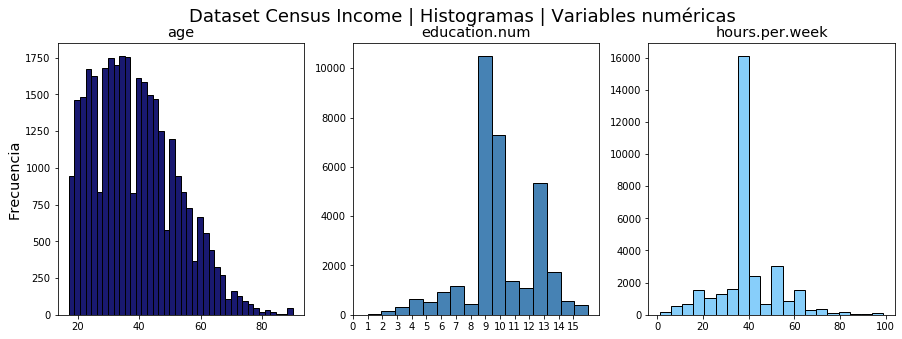

In [673]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()
fig.suptitle('Dataset Census Income | Histogramas | Variables numéricas', fontsize = 18)
      
ax0.set_title('age', fontsize = 14.5)
ax0.hist(data["age"], 40, color = "midnightblue", edgecolor = "black")
ax0.set_ylabel("Frecuencia", fontsize = 14.5)

ax1.set_title('education.num', fontsize = 14.5)
ax1.hist(data["education.num"], 16, color = "steelblue", edgecolor = "black")
x = np.arange(16)
ax1.set_xticks(x)
ax1.set_xticklabels(range(0,17,1))  

ax2.set_title('hours.per.week', fontsize = 14.5)
ax2.hist(data["hours.per.week"], 20, color ="lightskyblue", edgecolor = "black")


#### Outliers

In [674]:
from collections import Counter
#Función para detectar outliers
def detect_outlier(df, features):
    outlier_indices = []
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices) 
    return outlier_indices

In [686]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [689]:
#Tabla con los outliers
data.loc[detect_outlier(data, ['age', 'fnlwgt', 'education.num',
                               'capital.gain', 'capital.loss', 'hours.per.week'])]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
118,83,Self-emp-inc,153183,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K
128,81,Private,177408,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2377,26,United-States,>50K
199,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,72,Private,129912,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,25,United-States,<=50K
32546,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


### 3. Preparación conjuntos train y test

In [529]:
#Seleccionamos nuestra variable objetivo
Y = data['income']
#Seleccionamos las variables predictivas
X = data.drop(['income'],  axis=1)
#Eliminamos algunas columnas ya implícitas en otras columnas
X = X.drop(['education', 'marital.status', 'native.country'], axis=1)

In [530]:
#Indexamos los atributos categóricos
categorical = ['workclass', 'occupation', 'relationship', 'race', 'sex']

#for feature in categorical:
le = preprocessing.LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])

In [531]:
#Aplicamos One Hot Encoding a las variables que así lo requieran
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

X = encode(X, X.workclass)
X = encode(X, X.occupation)
X = encode(X, X.relationship)
X = encode(X, X.race)
X.drop(['workclass', 'occupation', 'relationship', 'race'], axis=1, inplace=True)

In [533]:
#X = X.rename(columns={"workclass_3": "Private", "occupation_3": "Executive-managerial", "occupation_7": "Other-service",
                  #"occupation_9": "Prof-specialty", "relationship_0": "Husband", "relationship_1": "Not in family",
                  #"relationship_3": "Own-child", "relationship_5": "Wife"})

In [534]:
#Guardamos el nombre de la variables
feature_names = list(X.columns)

In [535]:
#Reproducibilidad
seed = 888
#Separamos en conjunto de entrenamiento y de test, 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)

In [536]:
#Escalamos nuestras variables predictivas
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

### 4. Aplicación de modelos de comparación

#### 4.1. Random forest

In [718]:
#Creamos el modelo
RF_model = RandomForestClassifier()
#Valores para el parámetro de profundidad máxima del árbol max_depth
max_depths = np.arange(6,13)
#Valores para el número de árboles n_estimators
n_estimators = [10, 50, 100, 200, 500]
#Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = { 'max_depth': max_depths, 'n_estimators': n_estimators }
#Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
start = time.time()
grid_RF = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 4, return_train_score=True)
#Entrenamos los modelos
grid_RF.fit(X_train, Y_train)
end = time.time()
#Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_RF.best_score_)
print("Best parameters: ", grid_RF.best_params_)
#Representamos el heatmap creando un dataframe
print("Heatmap Random Forest.")
pvt_RF = pd.pivot_table(pd.DataFrame(grid_RF.cv_results_),
                     values='mean_test_score', index='param_max_depth', columns='param_n_estimators')
#heatm_RF = sns.heatmap(pvt_RF)
print("Tiempo de ajuste:", round(end - start, 3))

Best cross-validation score: 0.8606060606060606
Best parameters:  {'max_depth': 12, 'n_estimators': 50}
Heatmap Random Forest.
Tiempo de ajuste: 340.16


In [515]:
#Entrenamos el modelo con el mejor set de hiperparámetros
start = time.time()
RF_model = RandomForestClassifier(n_estimators=50, max_depth=12)
RF_model.fit(X_train, Y_train)
end = time.time()
#Calculamos su precisión
print("Precisión entrenamiento del Random Forest:", RF_model.score(X_train, Y_train))
print("Precisión del Random Forest:", RF_model.score(X_test, Y_test))
print("Tiempo de ejecución:", round(end - start, 3))

Precisión entrenamiento del Random Forest: 0.8794840294840295
Precisión del Random Forest: 0.8595995577938829
Tiempo de ejecución: 1.269


Text(0.5, 1.0, 'Dataset Census Income | Relevancia de atributos | Random Forest')

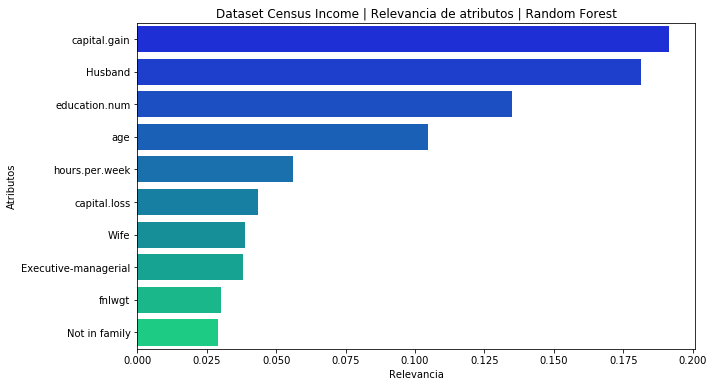

In [516]:
#Extraemos y mostramos la importancia de atributos
RF_importances = RF_model.feature_importances_
#Representamos en un diagrama de barras la relevancia de atributos
RF_feature_importance = pd.DataFrame({'Atributos':feature_names, 'Relevancia':RF_importances})
RF_feature_importance = RF_feature_importance.sort_values(by='Relevancia', ascending=False).reset_index()

plt.figure(figsize=[10,6])
sns.barplot(x='Relevancia', y='Atributos', data=RF_feature_importance[:10], palette="winter")
plt.title('Dataset Census Income | Relevancia de atributos | Random Forest')

#### 3.2. GradientBoosting

In [719]:
#Creamos el modelo
GB_model = GradientBoostingClassifier()
#Valores para el parámetro de profundidad máxima del árbol max_depth
max_depths = np.arange(6,13)
#Valores para el número de árboles n_estimators
n_estimators = [10, 50, 100, 200, 500]
#Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = { 'max_depth': max_depths, 'n_estimators': n_estimators }
#Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
start = time.time()
grid_GB = GridSearchCV(estimator = GB_model, param_grid = param_grid, cv = 4, return_train_score=True)
#Entrenamos los modelos
grid_GB.fit(X_train, Y_train)
end = time.time()
#Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_GB.best_score_)
print("Best parameters: ", grid_GB.best_params_)
#Representamos el heatmap creando un dataframe
print("Heatmap Random Forest.")
pvt_GB = pd.pivot_table(pd.DataFrame(grid_GB.cv_results_),
                     values='mean_test_score', index='param_max_depth', columns='param_n_estimators')
#heatm_GB = sns.heatmap(pvt_GB)
print("Tiempo de ajuste:", round(end - start, 3))

Best cross-validation score: 0.8715806715806715
Best parameters:  {'max_depth': 6, 'n_estimators': 100}
Heatmap Random Forest.
Tiempo de ajuste: 2128.369


In [518]:
#Entrenamos el modelo con el mejor set de hiperparámetros
start = time.time()
GB_model = GradientBoostingClassifier(learning_rate = 0.01, max_depth=6, n_estimators=100)
GB_model.fit(X_train, Y_train)
end = time.time()
#Calculamos su precisión
print("Precisión entrenamiento del Gradient Boosting:", GB_model.score(X_train, Y_train))
print("Precisión del Gradient Boosting:", GB_model.score(X_test, Y_test))
print("Tiempo de ejecución:", round(end - start, 3))

Precisión entrenamiento del Gradient Boosting: 0.8578214578214578
Precisión del Gradient Boosting: 0.854071981329075
Tiempo de ejecución: 6.819


Text(0.5, 1.0, 'Dataset Census Income | Relevancia de atributos | Gradient Boosting')

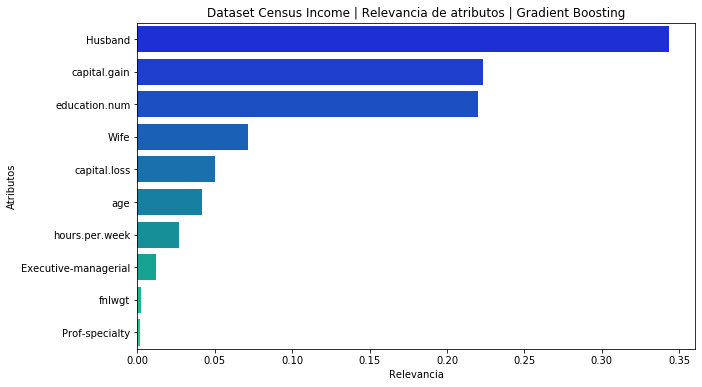

In [519]:
#Extraemos y mostramos la importancia de atributos
GB_importances = GB_model.feature_importances_
#Representamos en un diagrama de barras la relevancia de atributos
GB_feature_importance = pd.DataFrame({'Atributos':feature_names, 'Relevancia':GB_model.feature_importances_})
GB_feature_importance = GB_feature_importance.sort_values(by='Relevancia', ascending=False).reset_index()

plt.figure(figsize=[10,6])
sns.barplot(x='Relevancia', y='Atributos', data=GB_feature_importance[:10], palette="winter")
plt.title('Dataset Census Income | Relevancia de atributos | Gradient Boosting')

### 5. Red neuronal MLP Classifier

In [520]:
#Creamos y entrenamos el modelo
start = time.time()
MLP_model = MLPClassifier(solver='lbfgs', max_iter = 100000, alpha=1e-1, hidden_layer_sizes=(20, 20, 10), random_state=seed)
MLP_model.fit(X_train, Y_train)
end = time.time()
print("Precisión entrenamiento del MLP Classifier:", MLP_model.score(X_train, Y_train))
print("Precisión del MLP Classifier:", MLP_model.score(X_test, Y_test))
print("Tiempo de ejecución:", round(end - start, 3))

Precisión entrenamiento del MLP Classifier: 0.8874692874692874
Precisión del MLP Classifier: 0.8422798182041519
Tiempo de ejecución: 191.688


### 6. SHAP

In [521]:
#Importamos la librería SHAP
import shap
#Cargamos el código de visualización JS en el cuaderno de Jupyter
shap.initjs()

In [548]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)
#En lugar de utilizar todo el conjunto de entrenamiento para estimar los valores esperados, resumimos
#con un conjunto de kmedias ponderadas, cada una ponderada por el número de puntos que representan.
X_train_summary = shap.kmeans(X_train, 150)

In [432]:
#Calculamos el explicador
explainer = shap.KernelExplainer(MLP_model.predict_proba, X_train_summary)
#Calculamos las SHAP values
shap_values = explainer.shap_values(X_test)

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values1 = explainer.shap_values(X_test, nsamples = 500)

In [549]:
#shap_4hours

Text(0.5, 1.0, 'Dataset Census Income | Relevancia de atributos | SHAP')

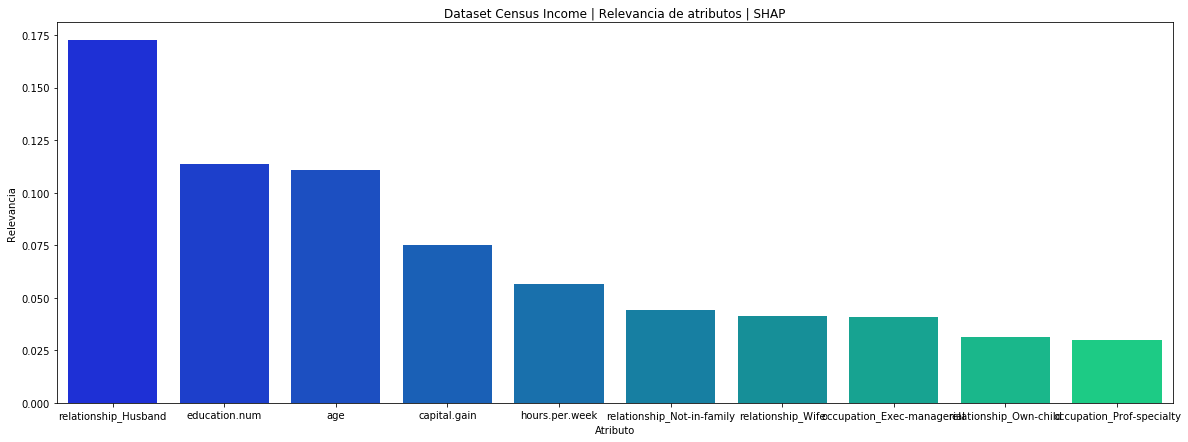

In [552]:
#Extraemos y mostramos la importancia de atributos
SHAP_importances = np.abs(shap_values[0]).mean(0) + np.abs(shap_values[1]).mean(0)
#Representamos en un diagrama de barras la relevancia de atributos
SHAP_feature_importance = pd.DataFrame({'Atributo':feature_names, 'Relevancia':SHAP_importances})
SHAP_feature_importance = SHAP_feature_importance.sort_values(by='Relevancia', ascending=False).reset_index()

plt.figure(figsize=[20,7])
sns.barplot(x='Atributo', y='Relevancia', data=SHAP_feature_importance[:10], palette="winter")
plt.title('Dataset Census Income | Relevancia de atributos | SHAP')

#### Comparación de modelos

In [553]:
#Creamos un dataframe con las relevancia de atributos de todos los modelos
All_feature_importance = pd.DataFrame({'Atributo':feature_names, 'SHAP':SHAP_importances,'RF':RF_model.feature_importances_, 'GB': GB_model.feature_importances_})
All_feature_importance = All_feature_importance.sort_values(by='SHAP', ascending=False).reset_index()

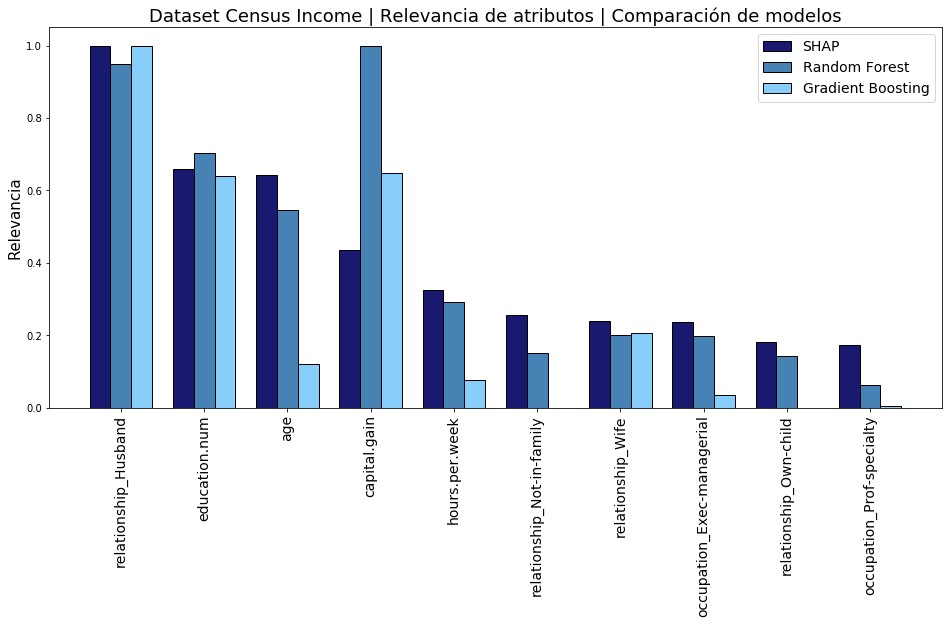

In [696]:
#Representamos con diagramas de barras triples
#All_feature_importance_names = ["Husband", "Education", "Age", "Capital gain", "Hours per week", "Not in family", "Wife", "Executive-Managerial", "Own child", "Prof-specialty"]
labels =  [ i for i in All_feature_importance['Atributo'][:10]]
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))
rects1 = ax.bar(x - width/2, All_feature_importance['SHAP'][:10]/All_feature_importance['SHAP'][0], width/2, label='SHAP', color='midnightblue',  edgecolor = 'black')
rects2 = ax.bar(x, All_feature_importance['RF'][:10]/RF_feature_importance['Relevancia'][0], width/2, label='Random Forest', color='steelblue',  edgecolor = 'black')
rects3 = ax.bar(x  + width/2 , All_feature_importance['GB'][:10]/GB_feature_importance['Relevancia'][0], width/2, label='Gradient Boosting', color='lightskyblue',  edgecolor = 'black')

ax.set_ylabel('Relevancia', fontsize = 15)
ax.set_title('Dataset Census Income | Relevancia de atributos | Comparación de modelos', fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 14)
plt.xticks(rotation=90)
ax.legend(fontsize = 14)

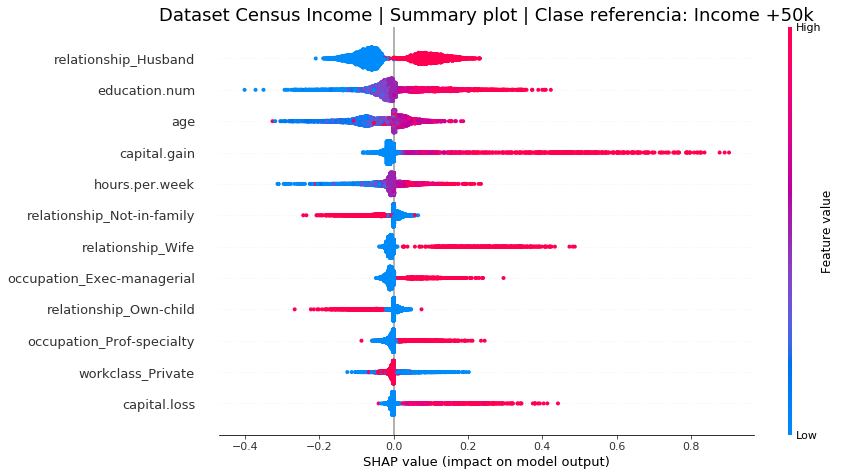

In [693]:
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.set_title('Dataset Census Income | Summary plot | Clase referencia: Income +50k', fontsize = 18)
shap.summary_plot(shap_values[1], X_test, max_display = 12, plot_size = None)

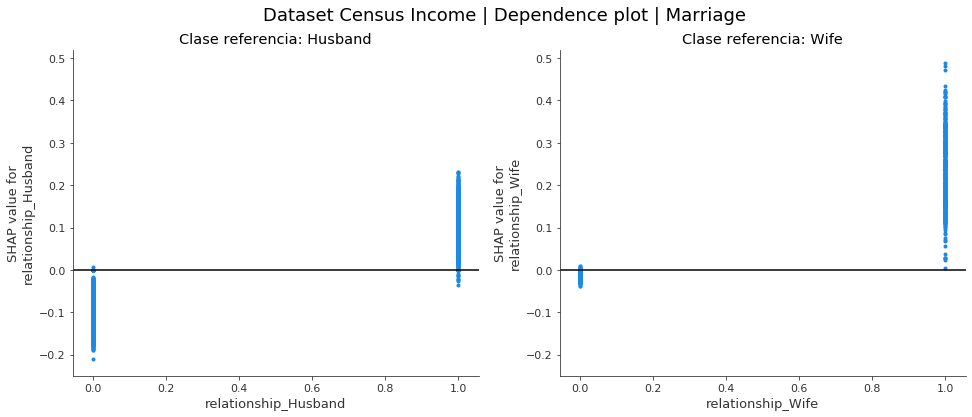

In [697]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Dataset Census Income | Dependence plot | Marriage', fontsize = 18)
axes[0].set_title('Clase referencia: Husband', fontsize = 14.5)
axes[1].set_title('Clase referencia: Wife', fontsize = 14.5)
axes[0].set_ylim([-0.25,0.52])
axes[1].set_ylim([-0.25,0.52])
axes[0].axhline(y = 0, color = 'black')
axes[1].axhline(y = 0, color = 'black')
shap.dependence_plot("relationship_Husband", shap_values[1], X_test, ax=axes[0], show=False, interaction_index=None)
shap.dependence_plot("relationship_Wife", shap_values[1], X_test, ax=axes[1], show=False, interaction_index=None)
plt.show()

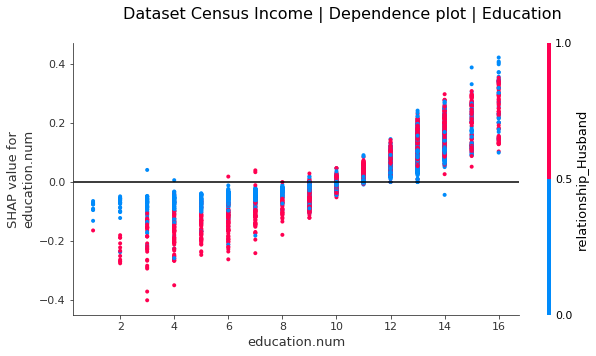

In [690]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4.5))
fig.suptitle('Dataset Census Income | Dependence plot | Education', fontsize = 16)
axes.axhline(y = 0, color = 'black')
shap.dependence_plot("education.num", shap_values[1], X_test, ax=axes, show=False)

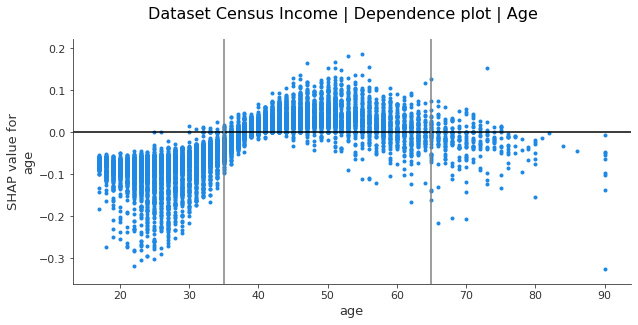

In [702]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4.5))
fig.suptitle('Dataset Census Income | Dependence plot | Age', fontsize = 16)
axes.axhline(y = 0, color = 'black')
axes.axvline(x = 35, color = 'grey')
axes.axvline(x = 65, color = 'grey')
shap.dependence_plot("age", shap_values[1], X_test, ax=axes, show=False, interaction_index=None)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Dataset Census Income | Dependence plot | Best Occupation', fontsize = 18)
axes[0].set_title('Clase referencia: Executive-managerial', fontsize = 14.5)
axes[1].set_title('Clase referencia: Private Sector', fontsize = 14.5)
axes[0].axhline(y = 0, color = 'black')
axes[1].axhline(y = 0, color = 'black')
shap.dependence_plot("occupation_Exec-managerial", shap_values[1], X_test, ax=axes[0], show=False, interaction_index=None)
shap.dependence_plot("workclass_Private", shap_values[1], X_test, ax=axes[1], show=False, interaction_index=None)
plt.show()

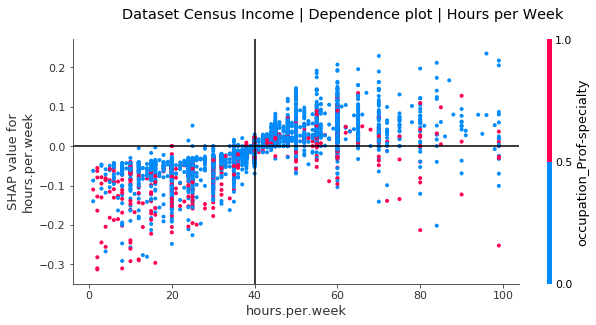

In [709]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4.5))
fig.suptitle('Dataset Census Income | Dependence plot | Hours per Week', fontsize = 14.5)
axes.axhline(y = 0, color = 'black')
axes.axvline(x = 40, color = 'black')
shap.dependence_plot("hours.per.week", shap_values[1], X_test, ax=axes, show=False,
                     interaction_index= "occupation_Prof-specialty")

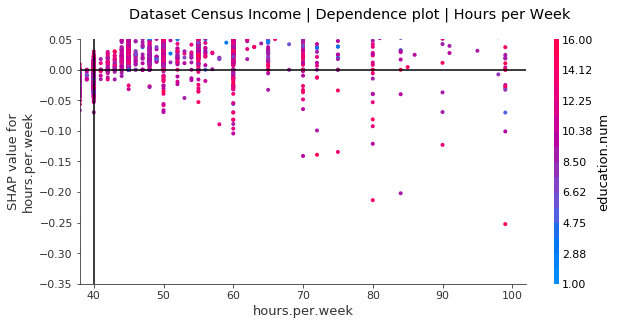

In [716]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4.5))
fig.suptitle('Dataset Census Income | Dependence plot | Hours per Week', fontsize = 14.5)
axes.axhline(y = 0, color = 'black')
axes.axvline(x = 40, color = 'black')
axes.set_ylim([-0.35,0.05])
axes.set_xlim([38,102])
shap.dependence_plot("hours.per.week", shap_values[1], X_test, ax=axes, show=False,
                     interaction_index= "education.num")